In [1]:
import uproot
print("uproot version: ", uproot.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import pickle


uproot version:  5.0.5


# Looking at input SURPRISE ROOT Files

In [2]:
f = uproot.open("/Users/leehagaman/uboone_python/uboone_ngem/data_files/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_NC_pi0_overlay_may8_reco2_hist_62280465_snapshot.root")


In [3]:
f["nuselection"]["NeutrinoSelectionFilter"].items()

[('selected', <TBranch 'selected' at 0x00013f5038b0>),
 ('run', <TBranch 'run' at 0x00013f538460>),
 ('sub', <TBranch 'sub' at 0x00013f538c10>),
 ('evt', <TBranch 'evt' at 0x00013f5393c0>),
 ('trk_id', <TBranch 'trk_id' at 0x00013f539b70>),
 ('shr_id', <TBranch 'shr_id' at 0x00013f53a320>),
 ('trk2_id', <TBranch 'trk2_id' at 0x00013f53aad0>),
 ('shr2_id', <TBranch 'shr2_id' at 0x00013f53b280>),
 ('trk3_id', <TBranch 'trk3_id' at 0x00013f53ba30>),
 ('shr3_id', <TBranch 'shr3_id' at 0x00013f550220>),
 ('shr_energy_tot', <TBranch 'shr_energy_tot' at 0x00013f5509d0>),
 ('shr_energy', <TBranch 'shr_energy' at 0x00013f551180>),
 ('shr_energy_second', <TBranch 'shr_energy_second' at 0x00013f551930>),
 ('shr_energy_third', <TBranch 'shr_energy_third' at 0x00013f5520e0>),
 ('shr_energy_tot_cali', <TBranch 'shr_energy_tot_cali' at 0x00013f552890>),
 ('shr_energy_cali', <TBranch 'shr_energy_cali' at 0x00013f553040>),
 ('shr_energy_second_cali',
  <TBranch 'shr_energy_second_cali' at 0x00013f5537f

In [4]:
for item in f["singlephotonana"]["vertex_tree"].items():
    if "sss" in item[0]:
        print(f'"{item[0]}",')

"sss_num_unassociated_hits",
"sss_num_unassociated_hits_below_threshold",
"sss_num_associated_hits",
"sss_num_candidates",
"sss_candidate_veto_score",
"sss_candidate_in_nu_slice",
"sss_candidate_num_hits",
"sss_candidate_num_wires",
"sss_candidate_num_ticks",
"sss_candidate_plane",
"sss_candidate_PCA",
"sss_candidate_mean_ADC",
"sss_candidate_ADC_RMS",
"sss_candidate_impact_parameter",
"sss_candidate_fit_slope",
"sss_candidate_fit_constant",
"sss_candidate_mean_tick",
"sss_candidate_max_tick",
"sss_candidate_min_tick",
"sss_candidate_mean_wire",
"sss_candidate_max_wire",
"sss_candidate_min_wire",
"sss_candidate_min_dist",
"sss_candidate_wire_tick_based_length",
"sss_candidate_energy",
"sss_candidate_angle_to_shower",
"sss_candidate_closest_neighbour",
"sss_candidate_remerge",
"sss_candidate_matched",
"sss_candidate_pdg",
"sss_candidate_parent_pdg",
"sss_candidate_trackid",
"sss_candidate_true_energy",
"sss_candidate_overlay_fraction",
"sss_candidate_matched_energy_fraction_best_plane",

In [5]:
f["singlephotonana"]["vertex_tree"]["sss3d_shower_score"].array()

<Array [[0], [0, ...], ..., [0, 0, 0, 0, 0, 0, 0]] type='43001 * var * float64'>

In [6]:
for item in f["lantern"]["EventTree"].items():
    var = item[0]
    if "true" not in var:
        print(var)

fileid
run
subrun
event
xsecWeight
nTruePrimParts
nTrueSimParts
recoNuE
foundVertex
vtxX
vtxY
vtxZ
vtxIsFiducial
vtxContainment
vtxDistToTrue
vtxScore
vtxMaxIntimePixelSum
vtxKPtype
vtxKPscore
vtxFracHitsOnCosmic
eventPCAxis0
eventPCAxis1
eventPCAxis2
eventPCAxis0TSlope
eventPCEigenVals
eventPCProjMaxGap
eventPCProjMaxDist
nKeypoints
kpClusterType
kpFilterType
kpMaxScore
kpMaxPosX
kpMaxPosY
kpMaxPosZ
nTracks
trackIsSecondary
trackNHits
trackHitFrac
trackCharge
trackChargeFrac
trackCosTheta
trackCosThetaY
trackDistToVtx
trackStartPosX
trackStartPosY
trackStartPosZ
trackStartDirX
trackStartDirY
trackStartDirZ
trackEndPosX
trackEndPosY
trackEndPosZ
trackClassified
trackNPlanesAbove
trackPID
trackElScore
trackPhScore
trackMuScore
trackPiScore
trackPrScore
trackComp
trackPurity
trackProcess
trackPrimaryScore
trackFromNeutralScore
trackFromChargedScore
trackRecoE
trackTruePID
trackTrueTID
trackTrueE
trackTruePurity
trackTrueComp
trackTrueElPurity
trackTruePhPurity
trackTrueMuPurity
trackTrue

# Looking at dataframes

In [7]:
with open("/Users/leehagaman/uboone_python/uboone_ngem/intermediate_files/all_df.pkl", "rb") as f:
    all_df = pickle.load(f)

all_df.head()

,wc_numu_score,wc_nc_delta_score,wc_nue_score,wc_shw_sp_n_20mev_showers,wc_nc_pio_score,wc_truth_NprimPio,wc_truth_NCDelta,wc_reco_nuvtxX,wc_reco_nuvtxY,wc_reco_nuvtxZ,...,blip_closest_upstream_type,lantern_max_showerPhScore,lantern_second_max_showerPhScore,glee_max_ssv_score,glee_max_3d_shower_score,wc_pandora_dist,wc_pandora_sce_dist,wc_lantern_dist,lantern_pandora_dist,lantern_pandora_sce_dist
0,-0.445759,-3.342609,-15.000000,2.0,3.510125,1.0,0.0,235.407227,-48.783516,139.724792,...,11.0,-0.018342,-0.026041,NaN,NaN,0.463519,4.322849,1.097474,0.913768,4.294996
1,-0.906318,-6.305526,-8.405992,3.0,3.168464,1.0,0.0,156.138885,-22.463396,221.575195,...,-211.0,-0.001047,-inf,NaN,NaN,2.216476,5.080805,2.357085,0.450795,3.126858
2,1.700583,-0.913104,-15.000000,1.0,-0.312040,1.0,0.0,43.013721,-46.719444,276.386078,...,-9.0,-0.002534,-0.050712,NaN,NaN,0.163704,1.303032,1.216184,1.376029,1.891409
3,-3.821578,-2.275953,-15.000000,-1.0,-1.729817,1.0,0.0,-1.000000,-1.000000,-1.000000,...,-9.0,-0.025310,-0.216446,NaN,NaN,796.719183,796.858833,807.549339,10.931549,10.964891
4,-1.000641,-7.236095,-9.779932,2.0,5.160080,1.0,0.0,144.645752,80.115562,394.592896,...,-11.0,-0.001016,-0.003547,NaN,NaN,24.835781,26.004986,0.933044,24.258465,25.400954


In [8]:
all_df.columns

Index(['wc_numu_score', 'wc_nc_delta_score', 'wc_nue_score',
       'wc_shw_sp_n_20mev_showers', 'wc_nc_pio_score', 'wc_truth_NprimPio',
       'wc_truth_NCDelta', 'wc_reco_nuvtxX', 'wc_reco_nuvtxY',
       'wc_reco_nuvtxZ',
       ...
       'blip_closest_upstream_type', 'lantern_max_showerPhScore',
       'lantern_second_max_showerPhScore', 'glee_max_ssv_score',
       'glee_max_3d_shower_score', 'wc_pandora_dist', 'wc_pandora_sce_dist',
       'wc_lantern_dist', 'lantern_pandora_dist', 'lantern_pandora_sce_dist'],
      dtype='object', length=101)

In [9]:
np.nan_to_num(all_df["glee_max_ssv_score"], nan=-999)

array([-999., -999., -999., ..., -999., -999., -999.])

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 37367.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-999.5 , -999.49, -999.48, -999.47, -999.46, -999.45, -999.44,
        -999.43, -999.4

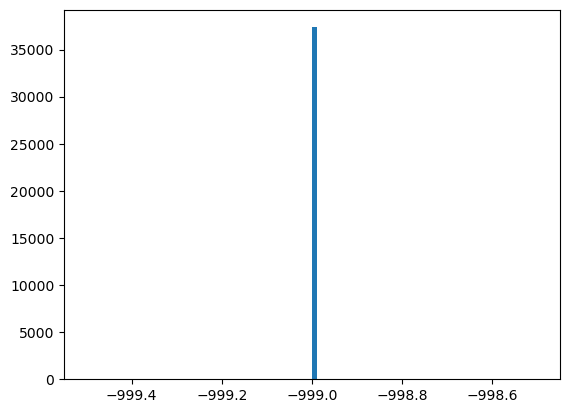

In [10]:
plt.hist(np.nan_to_num(all_df["glee_max_ssv_score"], nan=-999), bins=100)

In [11]:
all_df[[col for col in all_df.columns if "glee" in col]]

,glee_max_ssv_score,glee_max_3d_shower_score
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
37362,NaN,NaN
37363,NaN,NaN
37364,NaN,NaN
37365,NaN,NaN


In [12]:
for col in all_df.columns:
    if "glee" in col:
        print(f"{col}: {all_df[col][0]}")

glee_max_ssv_score: nan
glee_max_3d_shower_score: nan


In [13]:
all_df[[col for col in all_df.columns if "blip" in col]]

,nblips_saved,blip_closest_upstream_distance,blip_closest_upstream_angle,blip_closest_upstream_impact_parameter,blip_closest_upstream_energy,blip_closest_upstream_type
0,19,31.170003,2.620958,1.425354,14.628000,11.0
1,107,6.252864,45.514834,4.460992,45.842999,-211.0
2,33,136.932927,133.038721,100.083268,9.387000,-9.0
3,25,586.653361,116.217596,526.300069,1.130000,-9.0
4,53,30.883908,23.699958,12.413697,0.731000,-11.0
...,...,...,...,...,...,...
37362,15,171.175056,129.618575,131.857268,8.097000,-9.0
37363,20,450.350827,144.355433,262.444312,0.299000,-9.0
37364,13,324.462273,111.544031,301.793925,0.403000,-9.0
37365,53,194.521906,140.104060,124.765429,5.088000,-9.0


In [14]:
all_df["glee_sss_candidate_veto_score"]

KeyError: 'glee_sss_candidate_veto_score'

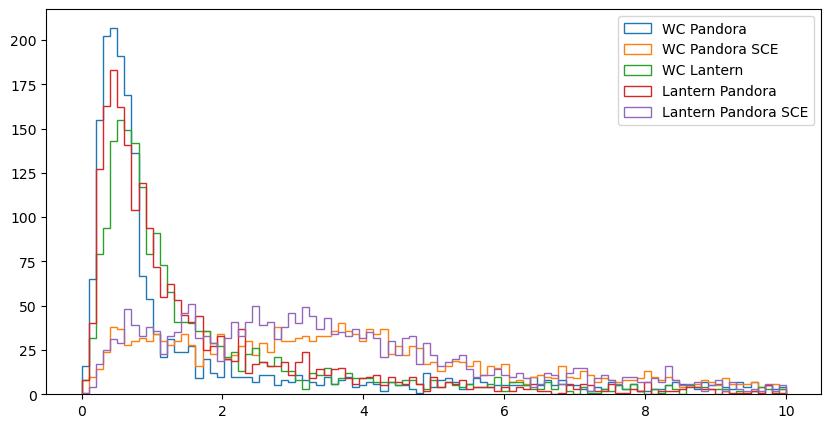

In [16]:
all_df[['wc_pandora_dist', 'wc_pandora_sce_dist','wc_lantern_dist', 'lantern_pandora_dist', 'lantern_pandora_sce_dist']]

plt.figure(figsize=(10, 5))
bins = np.linspace(0, 10, 100)
plt.hist(all_df['wc_pandora_dist'], histtype='step', bins=bins, label='WC Pandora')
plt.hist(all_df['wc_pandora_sce_dist'], histtype='step', bins=bins, label='WC Pandora SCE')
plt.hist(all_df['wc_lantern_dist'], histtype='step', bins=bins, label='WC Lantern')
plt.hist(all_df['lantern_pandora_dist'], histtype='step', bins=bins, label='Lantern Pandora')
plt.hist(all_df['lantern_pandora_sce_dist'], histtype='step', bins=bins, label='Lantern Pandora SCE')
plt.legend()
plt.show()

In [18]:
all_df["wc_reco_nuvtxX"]

0        235.407227
1        156.138885
2         43.013721
3         -1.000000
4        144.645752
            ...    
37362     -1.000000
37363     -1.000000
37364     -1.000000
37365     -1.000000
37366     -1.000000
Name: wc_reco_nuvtxX, Length: 37367, dtype: float64

In [19]:
all_df["pelee_reco_nu_vtx_x"]

0        234.975616
1        154.568924
2         43.067265
3         86.854706
4        140.657898
            ...    
37362    230.811081
37363    255.372452
37364     49.510784
37365    234.994812
37366     91.821136
Name: pelee_reco_nu_vtx_x, Length: 37367, dtype: float64

In [20]:
all_df["lantern_vtxX"]

0        235.061356
1        154.420975
2         42.829437
3         89.487000
4        143.837997
            ...    
37362   -999.000000
37363   -999.000000
37364   -999.000000
37365   -999.000000
37366   -999.000000
Name: lantern_vtxX, Length: 37367, dtype: float64